<center>
    <h1>An introduction to Bagging Models with Scikit-Learn</h1>
    <br /><br />
    Omoju Miller (<a href="https://twitter.com/omojumiller">@omojumiller</a>)
    <br /><br />
</center>

In [1]:
# Global imports and settings

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)


# Scikit-Learn
## Overview

* Machine learning library written in __Python__
* __Simple and efficient__, for both experts and non-experts
* Classical, __well-established machine learning algorithms__
* Shipped with <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> and <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>
* __BSD 3 license__

## Python stack for data analysis

- The __open source__ Python ecosystem provides __a standalone, versatile and powerful scientific working environment__, including: [NumPy](http://numpy.org), [SciPy](http://scipy.org), [IPython](http://ipython.org), [Matplotlib](http://matplotlib.org), [Pandas](http://pandas.pydata.org/), _and many others..._

<center> 
<img src="img/scikit-learn-logo.png" style="max-width: 120px; display: inline" />
<img src="img/numpy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/scipy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/ipython-logo.jpg" style="max-width: 120px; display: inline" />
<img src="img/matplotlib-logo.png" style="max-width: 120px; display: inline"/>
<img src="img/pandas-logo.png" style="max-width: 120px; display: inline" />
</center>

- Scikit-Learn builds upon NumPy and SciPy and __complements__ this scientific environment with machine learning algorithms;
- By design, Scikit-Learn is __non-intrusive__, easy to use and easy to combine with other libraries;
- Core algorithms are implemented in low-level languages.

## Data 

- Input data = Numpy arrays or Scipy sparse matrices ;
- Algorithms are expressed using high-level operations defined on matrices or vectors (similar to MATLAB) ;
    - Leverage efficient low-leverage implementations ;
    - Keep code short and readable. 

In [2]:
# Generate data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=20, random_state=42)
labels = ['r', 'b']
y = np.take(labels, (y < 10))
print(X) 
print(y[:5])

[[  4.206  -0.552]
 [  2.314  -8.493]
 [ -3.546   0.102]
 ..., 
 [ -9.634  10.064]
 [ -3.626   2.95 ]
 [  3.857   1.651]]
['r' 'r' 'b' 'b' 'r']


In [3]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)

(1000, 2)
(1000,)


In [4]:
# Rows and columns can be accessed with lists, slices or masks
print(X[[1, 2, 3]])     # rows 1, 2 and 3
print(X[:5])            # 5 first rows
print(X[500:510, 0])    # values from row 500 to row 510 at column 0
print(X[y == "b"][:5])  # 5 first rows for which y is "b"

[[ 2.314 -8.493]
 [-3.546  0.102]
 [ 3.449  2.63 ]]
[[ 4.206 -0.552]
 [ 2.314 -8.493]
 [-3.546  0.102]
 [ 3.449  2.63 ]
 [-9.091  8.055]]
[ 4.809  8.57   9.502  8.498  1.915  0.665  2.444 -3.616  6.329  1.323]
[[ -3.546   0.102]
 [  3.449   2.63 ]
 [  1.147   2.779]
 [ -7.863   7.176]
 [-11.281  10.928]]


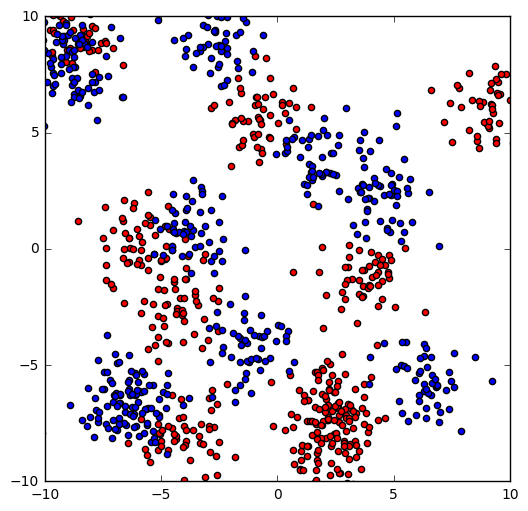

In [5]:
# Plot
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## A simple and unified API

All learning algorithms in scikit-learn share a uniform and limited API consisting of complementary interfaces:

- an `estimator` interface for building and fitting models;
- a `predictor` interface for making predictions;
- a `transformer` interface for converting data.

Goal: enforce a simple and consistent API to __make it trivial to swap or plug algorithms__. 

### Estimators

In [6]:
# Import the Decision Tree class
### Idea: greedily build a partition of the input space using cuts orthogonal to feature axes.
from sklearn.tree import DecisionTreeClassifier 

# Set hyper-parameters, for controlling algorithm
clf = DecisionTreeClassifier(max_depth=6)

# Learn a model from training data
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Predictors

In [7]:
# Make predictions  
print(clf.predict(X[:5])) 

['r' 'r' 'b' 'b' 'b']


In [8]:
# Compute (approximate) class probabilities
print(clf.predict_proba(X[:5]))

[[ 0.167  0.833]
 [ 0.     1.   ]
 [ 0.581  0.419]
 [ 0.989  0.011]
 [ 0.603  0.397]]


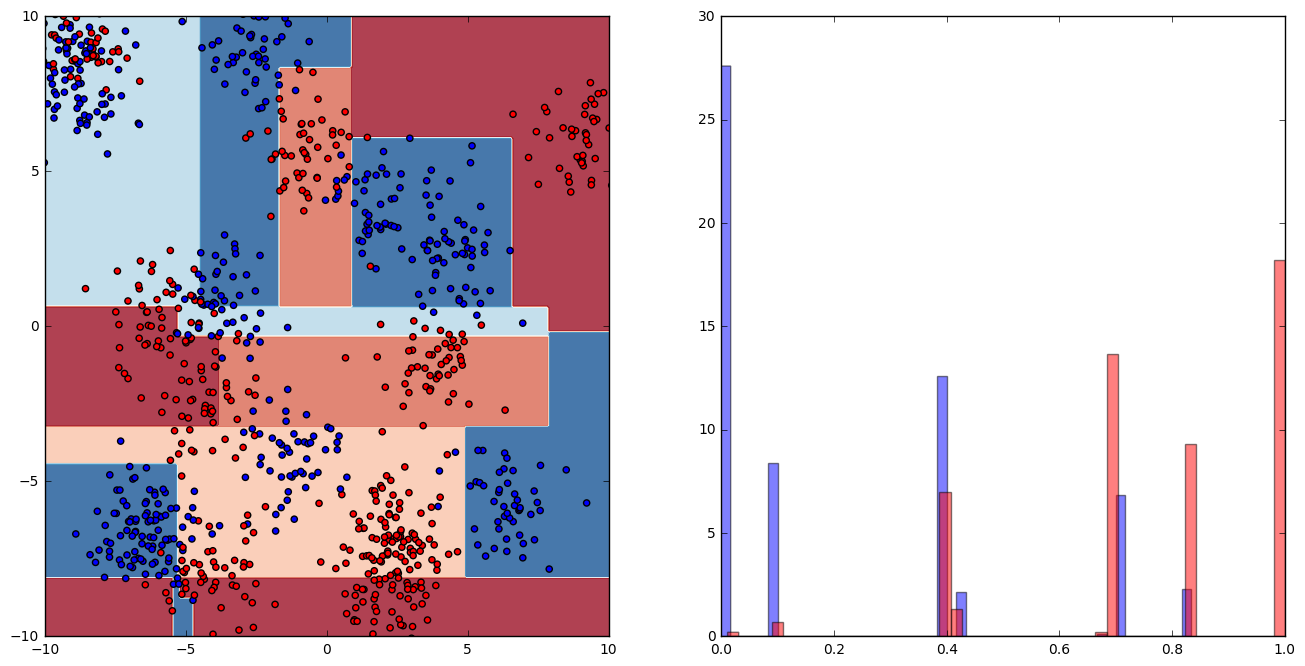

In [9]:
from tutorial import plot_clf
plot_clf(clf, X, y)

## Bagging Models

Idea: Build several decision trees with controlled randomness and average their decisions.
<center> 
<img src="img/bagging.jpg" style="max-width: 680px; display: inline" />
</center>

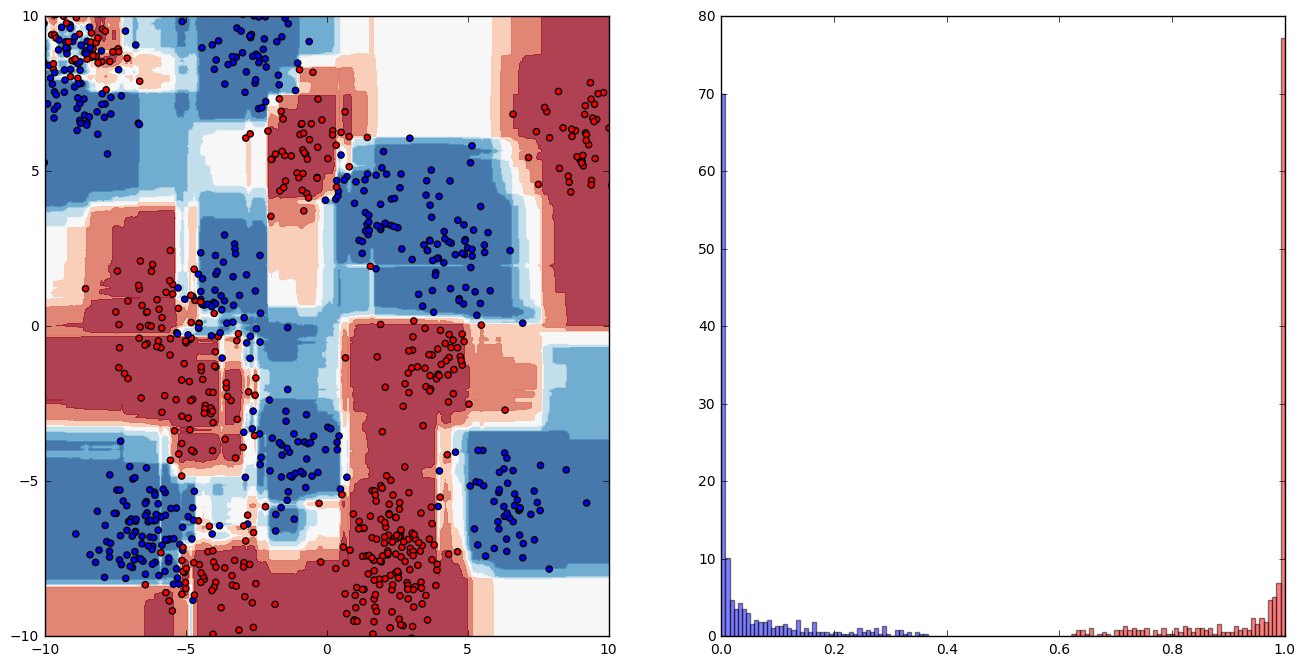

In [10]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=500)
clf.fit(X, y)
plot_clf(clf, X, y)

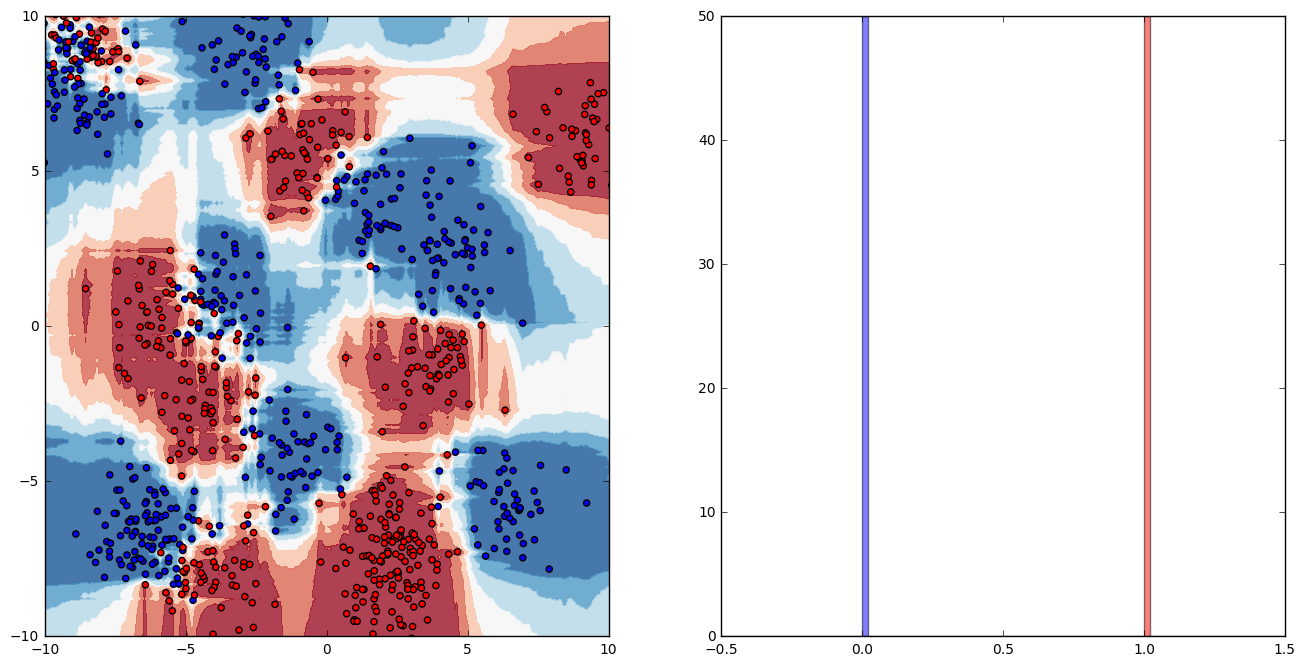

In [11]:
from sklearn.ensemble import ExtraTreesClassifier 
clf = ExtraTreesClassifier(n_estimators=500)
clf.fit(X, y)
plot_clf(clf, X, y)

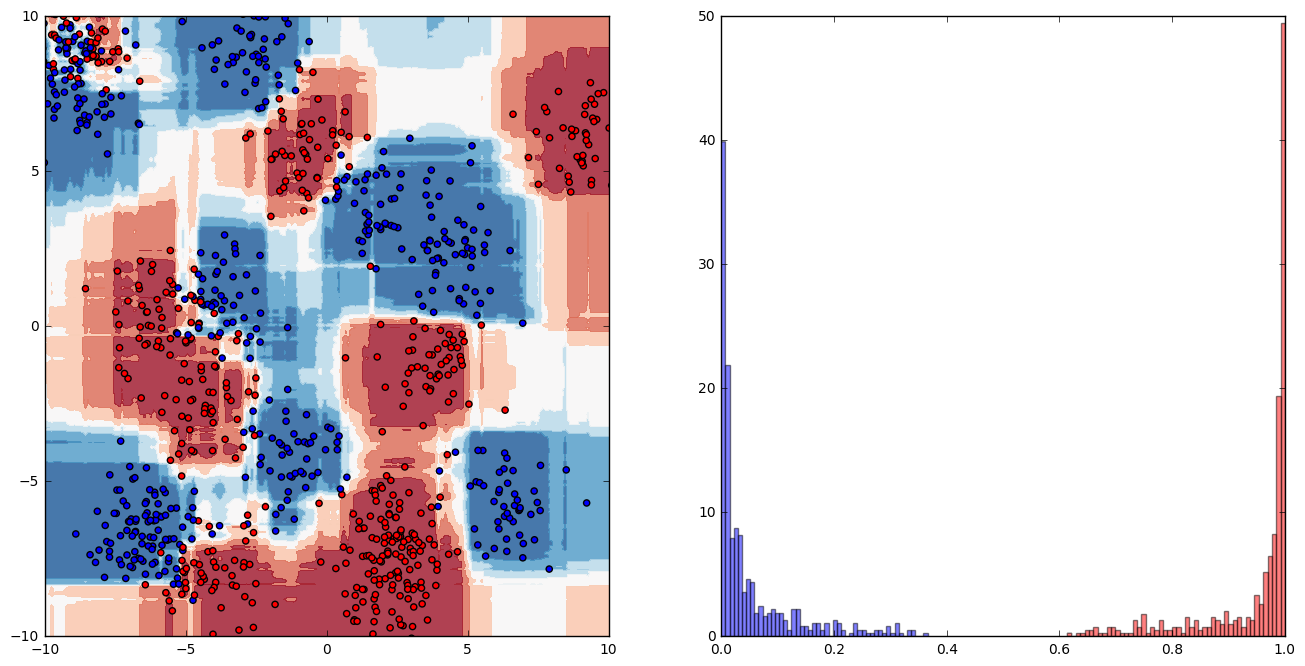

In [12]:
from tutorial import plot_clf
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X, y)
plot_clf(clf, X, y)

# Model evaluation and selection

In [13]:
from sklearn.metrics import zero_one_loss

print("Training error =", zero_one_loss(y, clf.predict(X)))

('Training error =', 0.0)


## Test error

Issue: the training error is a __biased__ estimate of the generalization error.

Solution: Divide ${\cal L}$ into two disjoint parts called training and test sets (usually using 70% for training and 30% for test).
- Use the training set for fitting the model;
- Use the test set for evaluation only, thereby yielding an unbiased estimate.

In [14]:
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train)


print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

('Training error =', 0.0)
('Test error =', 0.11599999999999999)


Summary: Beware of bias when you estimate model performance:
- Training score is often an optimistic estimate of the true performance;
- __The same data should not be used both for training and evaluation.__

## Metrics

### Default score

Estimators come with a built-in default evaluation score
* Accuracy for classification 
* $R^2$ score for regression

In [15]:
y_train = (y_train == "r")
y_test = (y_test == "r")
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, y_train) 
print("Default score =", clf.score(X_test, y_test))

('Default score =', 0.88400000000000001)


<center> 
<img src="img/precision.png" style="max-width: 680px; display: inline" />
</center>

In [16]:
from sklearn.metrics import precision_score

print("Precision =", precision_score(y_test, clf.predict(X_test)))

('Precision =', 0.86923076923076925)


<center> 
<img src="img/recall.jpeg" style="max-width: 680px; display: inline" />
</center>

In [17]:
from sklearn.metrics import recall_score
print("Recall =", recall_score(y_test, clf.predict(X_test)))

('Recall =', 0.90400000000000003)


# Model Selection
- Finding good hyper-parameters is crucial to control under- and over-fitting, hence achieving better performance.
- The estimated generalization error can be used to select the best model.

## Under- and over-fitting

- Under-fitting, __high Bias__: the model is too simple and does not capture the true relation between X and Y.
- Over-fitting, __high Variance__: the model is too specific to the training set and does not generalize.

<center> 
<img src="img/modelComplexity.jpg" style="max-width: 680px; display: inline" />
</center>

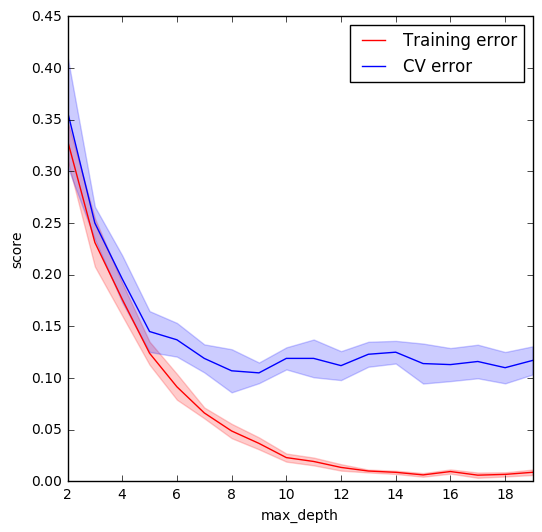

In [18]:
from sklearn.model_selection import validation_curve

# Evaluate parameter range in CV
param_range = range(2, 20)
param_name = "max_depth"


train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, 
    param_name=param_name, 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best");

In [19]:
# Best trade-off
print("%s = %d, CV error = %f" % (param_name,
                                  param_range[np.argmax(test_scores_mean)],
                                   1. - np.max(test_scores_mean)))

max_depth = 9, CV error = 0.105000
